# Normalization
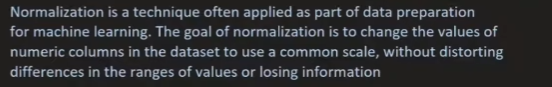

Types of Normalization
 1. Min Max Scaling 
 2. Mean Normalization
 3. Max absorb 
 4. Robust scaling 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])

In [20]:
# df=df.iloc[:,0:3]
# df.describe()
df.info()
# df['Class_label'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class_label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic_acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [11]:
df.columns=['Class_label','Alcohol','Malic_acid']

<Axes: xlabel='Alcohol', ylabel='Density'>

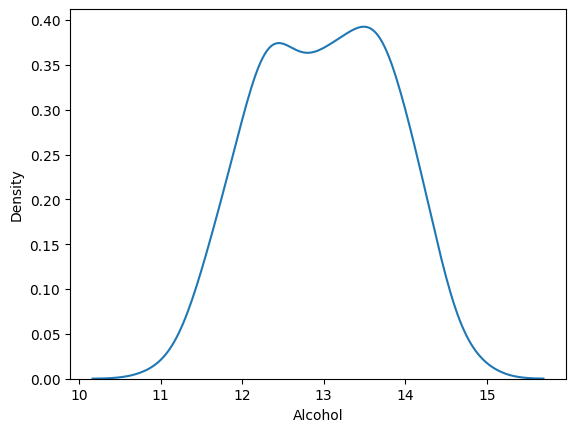

In [14]:
#Normal graph of alcohol
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic_acid', ylabel='Density'>

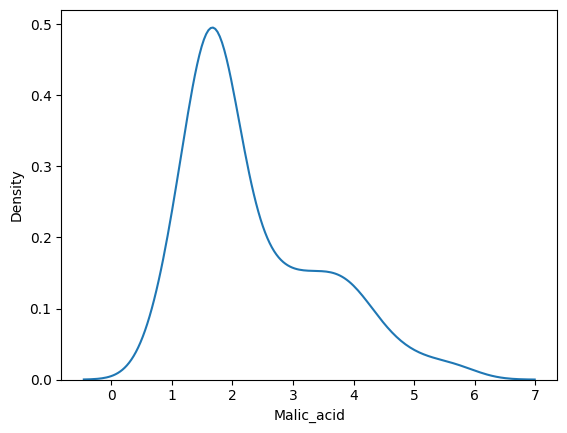

In [15]:
sns.kdeplot(df['Malic_acid'])

<Axes: xlabel='Alcohol', ylabel='Malic_acid'>

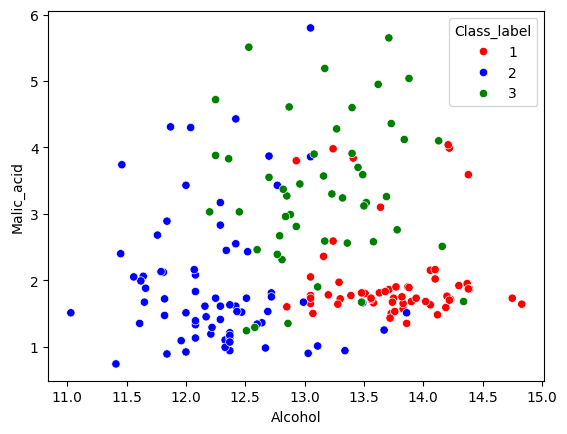

In [17]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic_acid'],hue=df['Class_label'],palette=color_dict)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class_label', axis=1),  # Features (X) - all columns except target
    df['Class_label'],               # Target variable (y) - what we want to predict
    test_size=0.3,                   # 30% for testing, 70% for training
    random_state=0                   # Seed for reproducible results
)

X_train.shape, X_test.shape

((124, 2), (54, 2))

## Min Max Scaling 

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Convert numpy array into Dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [32]:
np.round(X_train.describe(),1)


,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [34]:
np.round(X_train_scaled.describe(),1)
#  After transformation max - 1 and min - 0 for both alocohol & malic_acid

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


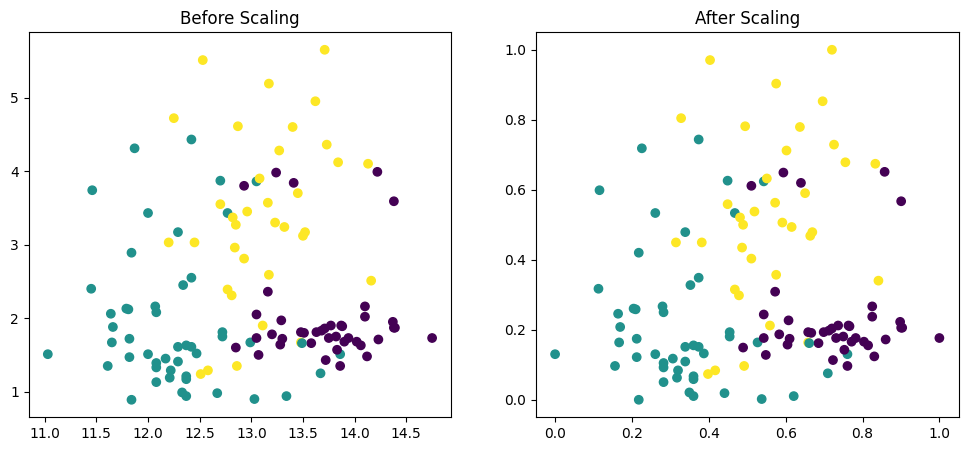

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic_acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic_acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

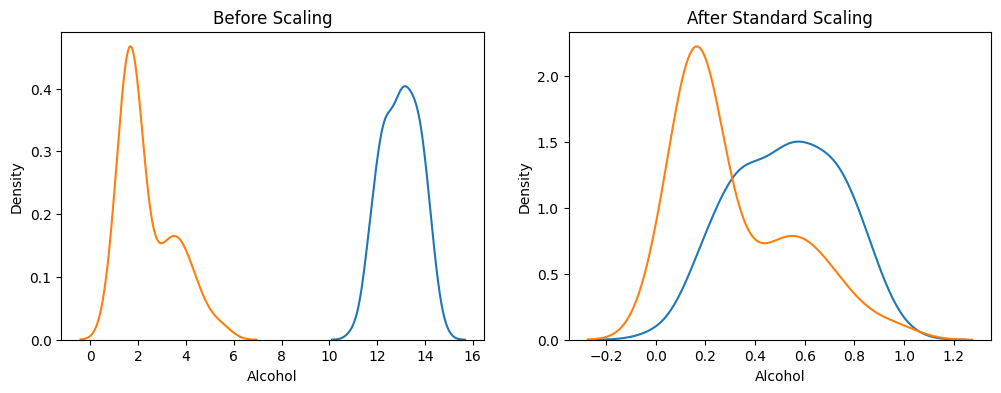

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic_acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2)
plt.show()
# To compare before and after scaling of both alocohol and malic acid

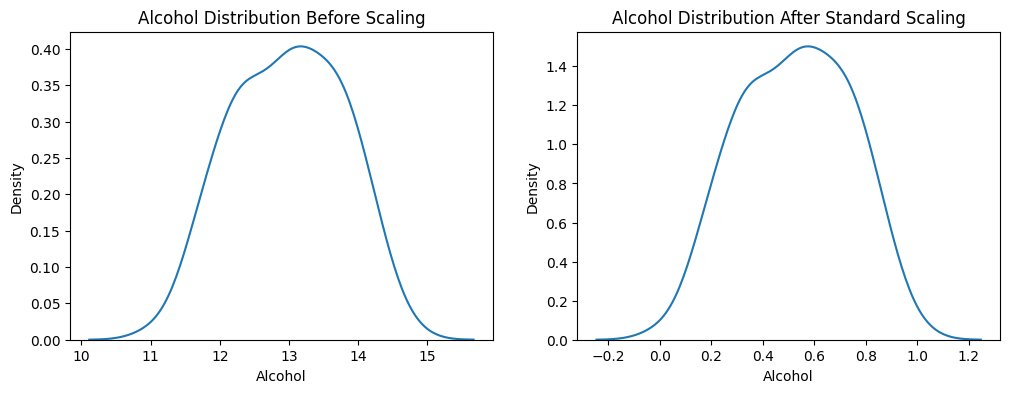

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

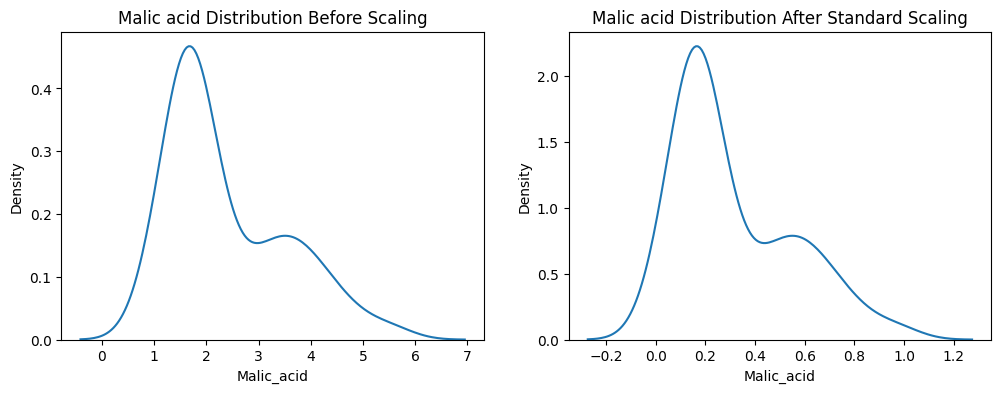

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic_acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2)
plt.show()

## Mean Normalization
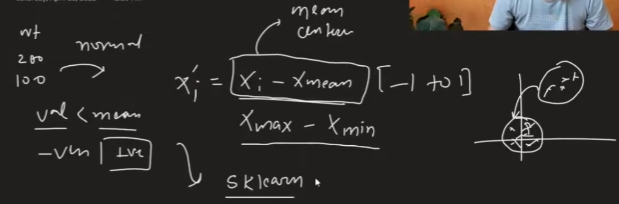

### - Rarely used and scikit dont have any module of this also - Need to write the code

## Max Abs scaling 
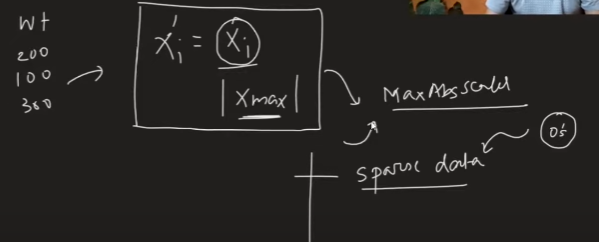
### - More zeros are there - use this scaling 

## Robust Scaling 
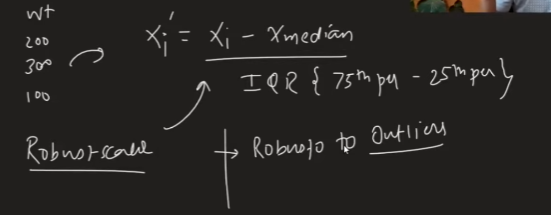
### Numerical problem - need to use IQR - It robust to outlier 

# Feature scaling is reuired???

### - Standardization 
1. Most of problem
### - Normalization
1. Min and Max value know - MinMaxScaler
2. Outlier are there in the dataset - robust scaling 
3. Matrix - MaxAbs Scaling 